<a href="https://colab.research.google.com/github/N6118/MiniMLprojects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


In [3]:
#https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv
data = pd.read_csv("/content/drive/MyDrive/Data Sets/car data.csv")

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [7]:
data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace = True)
data.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace = True)
data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace = True)

In [8]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [17]:
X = data.drop(["Car_Name","Selling_Price"],axis=1)
Y = data["Selling_Price"]

In [18]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,train_size = 0.1 , random_state = 2)

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train , Y_train)

LinearRegression()

In [21]:
model_prediction = model.predict(X_train)

In [27]:
error = metrics.r2_score(Y_train , model_prediction)
print(error)

0.9339260417862196


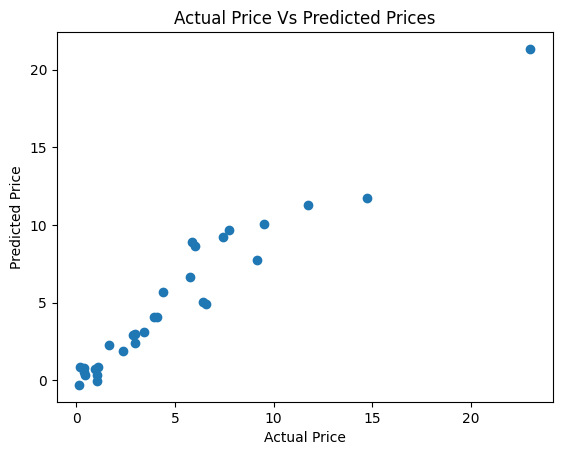

In [23]:
plt.scatter(Y_train ,model_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Prices")
plt.show()


In [24]:
test_data_prediction = model.predict(X_test)

In [26]:
error = metrics.r2_score(Y_test , model_prediction)
print(error)

ValueError: ignored

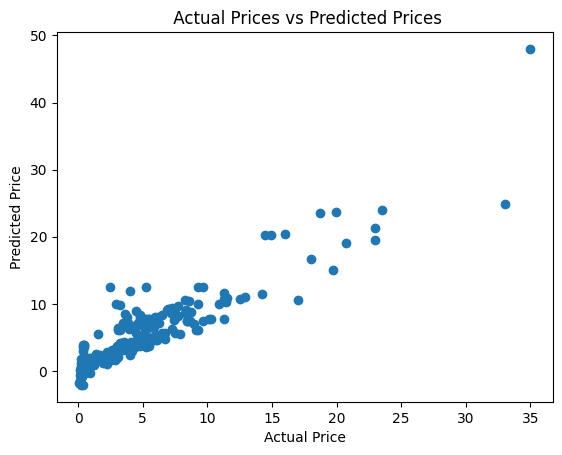

In [28]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [29]:
lass_reg_model = Lasso()
lass_reg_model.fit(X_train,Y_train)

training_data_prediction = lass_reg_model.predict(X_train)
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8719112462174848


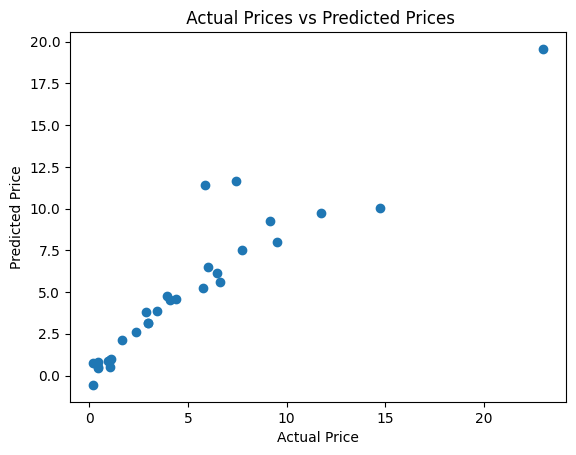

In [30]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [31]:
test_data_prediction = lass_reg_model.predict(X_test)

R squared Error :  0.7900952612361791


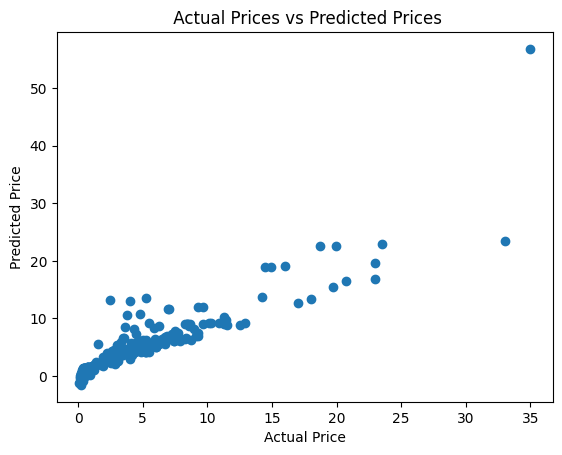

In [32]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()